Importing all necessary items.

In [75]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Taking dataset from Iris.

In [76]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(url, header=None, names=column_names)

In [77]:
df_subset = df[df['class'].isin(['Iris-setosa', 'Iris-versicolor'])]
df_subset['class'] = df_subset['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)

/tmp/ipython-input-1490740276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset['class'] = df_subset['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)


Setting training.

In [78]:
X = df_subset[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
y = df_subset['class'].values
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [80]:
X_train = np.insert(X_train, 0, 1, axis=1)
X_val = np.insert(X_val, 0, 1, axis=1)

In [81]:
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")

X_train: (80, 5)
X_val: (20, 5)


In [82]:
class SingleLayerPerceptron:
    def __init__(self, learning_rate=0.1, n_epochs=50):
        self.lr = learning_rate
        self.epochs = n_epochs
        self.weights = None
        self.history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    def _sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X_train, y_train, X_val, y_val):
        n_features = X_train.shape[1]
        self.weights = np.random.rand(n_features) * 0.1

        for epoch in range(self.epochs):

            z_train = np.dot(X_train, self.weights)
            y_pred_train = self._sigmoid(z_train)
            train_loss = np.mean((y_train - y_pred_train)**2)
            train_preds_binary = (y_pred_train >= 0.5).astype(int)
            train_acc = np.mean(train_preds_binary == y_train)


            error = y_pred_train - y_train
            gradient = np.dot(X_train.T, error) / X_train.shape[0]
            self.weights -= self.lr * gradient


            z_val = np.dot(X_val, self.weights)
            y_pred_val = self._sigmoid(z_val)
            val_loss = np.mean((y_val - y_pred_val)**2)
            val_preds_binary = (y_pred_val >= 0.5).astype(int)
            val_acc = np.mean(val_preds_binary == y_val)

            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)

            print(f'Epoch {epoch+1}/{self.epochs} - '
                  f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f} | '
                  f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    def predict(self, X):
        z = np.dot(X, self.weights)
        y_pred_proba = self._sigmoid(z)
        return (y_pred_proba >= 0.5).astype(int)

Checking for final weight.

In [91]:
np.random.seed(42)
slp = SingleLayerPerceptron(n_epochs=5, learning_rate=0.1)
slp.fit(X_train, y_train, X_val, y_val)
print("\nFinished training.")
print("Final Weight (Including bias):", slp.weights)

Epoch 1/5 - Train Loss: 0.2274, Train Acc: 0.7875 | Val Loss: 0.1973, Val Acc: 0.8500
Epoch 2/5 - Train Loss: 0.1964, Train Acc: 0.9625 | Val Loss: 0.1715, Val Acc: 0.9000
Epoch 3/5 - Train Loss: 0.1703, Train Acc: 1.0000 | Val Loss: 0.1499, Val Acc: 1.0000
Epoch 4/5 - Train Loss: 0.1484, Train Acc: 1.0000 | Val Loss: 0.1319, Val Acc: 1.0000
Epoch 5/5 - Train Loss: 0.1300, Train Acc: 1.0000 | Val Loss: 0.1168, Val Acc: 1.0000

Finished training.
Final Weight (Including bias): [ 0.03333609  0.24314546 -0.07497188  0.25814777  0.21131201]


Creating the graph for said SLP result.


Graphic has been succesfully saved.


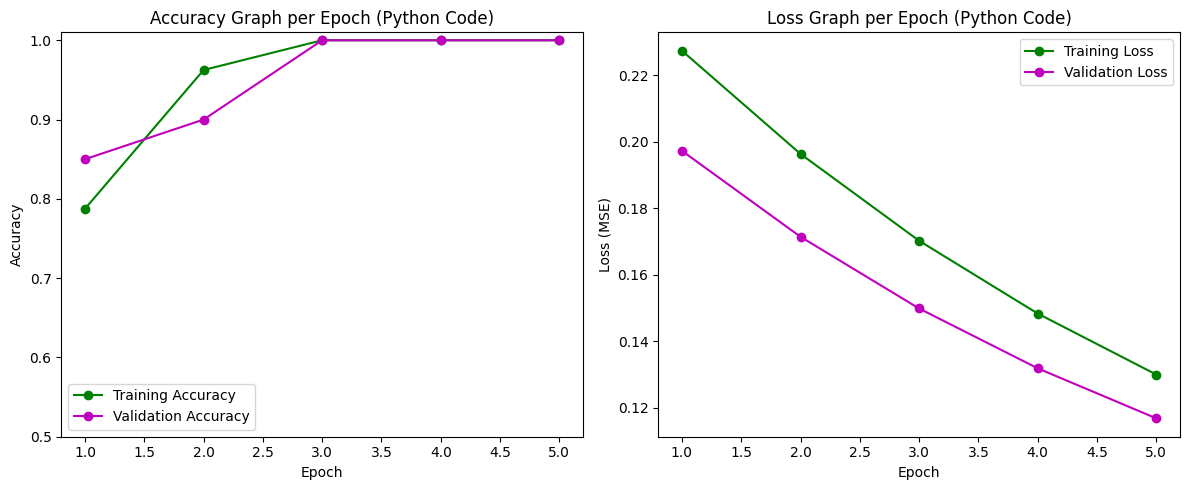

In [90]:
history = slp.history
epochs_range = range(1, slp.epochs + 1)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, history['train_acc'], 'go-', label='Training Accuracy')
plt.plot(epochs_range, history['val_acc'], 'mo-', label='Validation Accuracy')
plt.title('Accuracy Graph per Epoch (Python Code)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0.5, 1.01)


plt.subplot(1, 2, 2)
plt.plot(epochs_range, history['train_loss'], 'go-', label='Training Loss')
plt.plot(epochs_range, history['val_loss'], 'mo-', label='Validation Loss')
plt.title('Loss Graph per Epoch (Python Code)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend()

plt.tight_layout()

plt.savefig('pythongraphic.png')
print("\nGraphic has been succesfully saved.")
plt.show()